<div dir=rtl>
نام و نام‌خانوادگی:
    <br/>علیرضا عبدالله پور
    <br/>شماره دانشجویی:
</div>

this is my codes for HW2 of machine learning course in sharif university

<a href="https://scholar.google.com/citations?user=Ag_W89UAAAAJ&hl=en">Prof.Hosseini</a>


<a href="https://mlclass.ir/">MLclass</a>


<div dir="rtl">
    <h1>
        تمرین دوم
    </h1>
</div>
<p></p>
<div dir="rtl">
یکی از جذابیت‌های یادگیری ماشین کاربرد آن در صنایع مختلف است اما یکی از صنایعی که شاید بتواند حداکثر بهره را از این علم ببرد صنعت بانکداری‌ست. برای این منظور به سراغ اطلاعات بانکی هزار نفر می‌رویم و سعی می‌کنیم تحلیلی روی این داده‌های بانکی داشته باشیم.    
</div>

<div dir="rtl">
توجه داشته باشید که در این تمرین قرار بر کد نویسی‌است و برای پیاده‌سازی یک ایده شاید هزاران راه وجود داشته باشد. اما همانطور که می‌دانید تمام راه‌هایی پیاده‌سازی راه‌های منطقی و درستی نیستند به همین خاطر، دو مساله در اینجا دارای اهمیت بالایی هستند اول تمیز کد زدن و دوم استفاده از ظرفیت‌های موجود در زبان، کتابخانه‌ها و همچنین فریم‌ورک‌هایی‌ست که شما در صورت لزوم با آن‌ها کار می‌کنید. 
    <ul>
    <li/>
        تا مجبور نشدید از حلقه و شرط استفاده نکنید.
    <li/>
          از توانایی‌های کتابخانه‌هایی نظیر 
        numpy و
        pandas استفاده کنید. 
        صد البته از امکانات sklearn و pytorch و ... استفاده نکنید.
    <li/>
        از اول چرخی را اختراع نکنید.
    <li/>
        نمودارها در جایی که انتخاب نوع نمودار با شماست باید بطور واضح، منظوری را بیان کنند.یعنی در جاهایی که برای شما مشخص نشده از چه چیزی استفاده کنید با دلیل منطقی و استدلال(لزومی به نوشتن استدلال نیست) انتخاب را انجام دهید نه بصورت تصادفی و اولین نموداری که با آن آشنا هستید.
    </ul>
    رعایت نکردن این قوانین ممکن به از دست رفتن نمره بخش‌هایی از تمرین شما منجر شود حتی در صورتی که پاسخ صحیح توسط کد شما تولید شده باشد.
</div>

In [204]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns               
%matplotlib inline
sns.set()

import warnings                                            
warnings.filterwarnings('ignore') 



<div dir=rtl>
    <h2>
        بخش اول پاکسازی داده‌ها
    (۱۷ نمره)
    </h2>
    </div>

<div dir=rtl>
    ۱.(۳ نمره)
    در این بخش شما برای رسیدن به درک درستی از داده‌ها آن‌ها را لود کنید و چند سطر ابتدایی آن‌ها را نشان دهید.
    </div>

In [205]:
data = pd.read_csv("/home/alireza/Desktop/HW2/data.csv")
data.head(10)

#print(data.shape)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Loaned Before
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,T
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,T
2,2,49,male,1,own,little,NaN,2096,12,education,good,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,N
4,4,53,male,2,free,little,little,4870,24,car,bad,*
5,5,35,male,1,free,NaN,NaN,9055,36,education,good,Y
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,-
7,7,35,male,3,rent,little,moderate,6948,36,car,good,1
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good,-
9,9,28,male,3,own,little,moderate,5234,30,car,bad,F


<div dir=rtl>
    ۲.(۵ نمره)
 در این بخش سعی کنید اطلاعات زیر را از داده‌ها نمایش دهید:
    <ul>
        <li\>
            جنس اطلاعات هر ستون را نمایش دهید(عددی یا غیر عددی بودن)
        <li\>
        درصد داده‌های Null هر ستون    
        <li\>
        برای ستون‌ها با داده‌های عددی اطلاعات آماری(میانگین، واریانس، کوچک‌ترین و بزرگترین) را نمایش دهید.
        <li\>
            برای ستون‌ها با داده‌های غیر عددی تعداد عناصر یکتا در آن ستون را نمایش دهید(unique)
</div>

In [206]:
# Get list of categorical variables 
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)



Categorical variables:
['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk', 'Loaned Before']


In [207]:
#finding out how many NaN values are there in each feature 
features_na = [features for features in data.columns if data[features].isnull().sum()>1]
for feature in features_na:
      print(feature, np.round(data[feature].isnull().mean(), 4),'%')


Saving accounts 0.183 %
Checking account 0.394 %


In [208]:
num_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('No. of Numerical variables:', len(num_features))

No. of Numerical variables: 5


In [209]:
print(num_features)

['Unnamed: 0', 'Age', 'Job', 'Credit amount', 'Duration']


In [210]:
check_null = data.isna().sum()
check_null = check_null.reset_index()
check_null



,index,0
0,Unnamed: 0,0
1,Age,0
2,Sex,0
3,Job,0
4,Housing,0
5,Saving accounts,183
6,Checking account,394
7,Credit amount,0
8,Duration,0
9,Purpose,0


In [211]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [212]:
#unique feature for categorical columns!

for i in object_cols:
    #print(i)
    print(data[i].unique())


['male' 'female']
['own' 'free' 'rent']
[nan 'little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' nan 'rich']
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
['good' 'bad']
['T' '0' 'N' '*' 'Y' '-' '1' 'F' '--']


<div dir=rtl>
    ۳.(۲ نمره)
    همانطور که دیده می‌شود ستون اول اسمی ندارد برای آن اسمی مناسب
    (مثلا id) بگذارید.
    </div>

In [213]:
#data.head(10)
data.rename(columns={'Unnamed: 0':'Id'}, inplace=True)
data.head(10)

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Loaned Before
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,T
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,T
2,2,49,male,1,own,little,NaN,2096,12,education,good,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,N
4,4,53,male,2,free,little,little,4870,24,car,bad,*
5,5,35,male,1,free,NaN,NaN,9055,36,education,good,Y
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,-
7,7,35,male,3,rent,little,moderate,6948,36,car,good,1
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good,-
9,9,28,male,3,own,little,moderate,5234,30,car,bad,F


In [214]:
for i in range(0,len(data["Loaned Before"])):
    if data["Loaned Before"][i] == "T" or data["Loaned Before"][i]=="Y"or data["Loaned Before"][i]=="1":
        data["Loaned Before"][i] = "True"
    
    elif data["Loaned Before"][i] == "F" or data["Loaned Before"][i] =="N" or data["Loaned Before"][i]=="0":
        data["Loaned Before"][i] = "False"
        
    elif data["Loaned Before"][i] == "*" or data["Loaned Before"][i]=="-":
        data["Loaned Before"][i] = "NO_data"
    



In [215]:
data["Loaned Before"].head(20)

0        True
1        True
2       False
3       False
4     NO_data
5        True
6     NO_data
7        True
8     NO_data
9       False
10       True
11       True
12       True
13    NO_data
14       True
15       True
16    NO_data
17    NO_data
18       True
19       True
Name: Loaned Before, dtype: object

<div dir=rtl>
    ۵.(۴ نمره)
    برای ستون‌هایی که دارای داده‌های تهی هستند تصمیمی اتخاذ کنید و برای اتخاذ این تصمیم ابتدا به بررسی روش‌های برخورد با داده‌های تهی بپردازید و ۴ مورد از سیاست‌هایی که می‌توان در پیش گرفت را در اینجا شرح دهید.
    و مقادیر تهی را در دیتافریم کنونی با 
    no-info 
    جایگزین کنید
</div>

<div dir=rtl>
    <a href="https://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f">Handling Nan data</a>
     دراین لینک به صورت کامل نحوه مواجهه با داده های Nan !!آموزش داده شده 
</div>



In [216]:
data.fillna("no-info",inplace=True)
data

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Loaned Before
0,0,67,male,2,own,no-info,little,1169,6,radio/TV,good,True
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,True
2,2,49,male,1,own,little,no-info,2096,12,education,good,False
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,False
4,4,53,male,2,free,little,little,4870,24,car,bad,NO_data
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,no-info,1736,12,furniture/equipment,good,True
996,996,40,male,3,own,little,little,3857,30,car,good,True
997,997,38,male,2,own,little,no-info,804,12,radio/TV,good,True
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad,False


<div dir=rtl>
    <h2>
        EDA 
        (۴۱ نمره)
    </h2>
    </div>

<div dir=rtl>
    تا به اینجای کار اندکی با داده‌ها آشنا شدیم و همچنین سعی شد مشکلاتی را که در این دادگان وجود داشت اصلاح کنیم. در این بخش به سراغ EDA می‌رویم تا کمی دیدمان نسبت به این داده‌ها گسترش پیدا کند. 
</div>

<div dir=rtl>
    ۶.(۲ نمره)
    در یک نمودار تعداد افراد با ریسک خوب و بد را با هم مقایسه نمایید.
    </div>

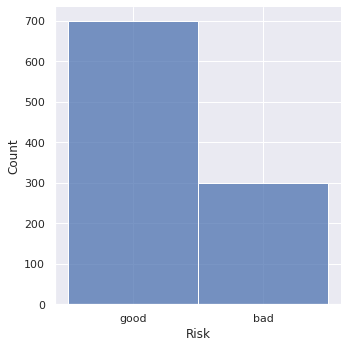

In [217]:
sns.displot(data=data, x="Risk");

<div dir=rtl>
    ۷.(۳ نمره)
    همان کار سوال قبلی را این‌بار به تفکیک جنسیت انجام دهید.(در یک نمودار این کار را انجام دهید.)
    </div>

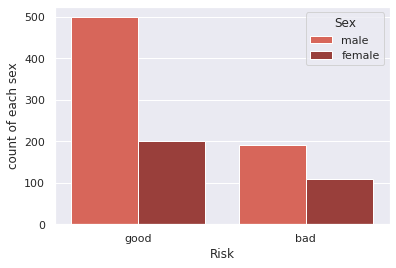

In [218]:
nemoodar = sns.countplot(x=data["Risk"], hue=data["Sex"], data=pd.melt(data),palette="Reds_d");
nemoodar.set(xlabel="Risk", ylabel="count of each sex");

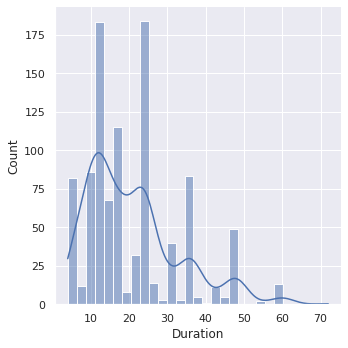

In [219]:
sns.displot(data = data,x="Duration",kde=True);

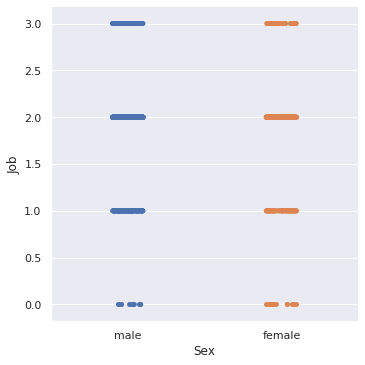

In [220]:
sns.catplot(x="Sex", y="Job", data=data)

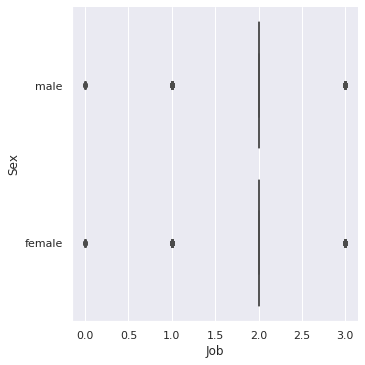

In [221]:
sns.catplot(x="Job", y="Sex",kind ="box", data=data)

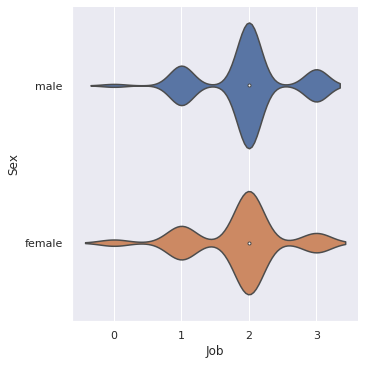

In [222]:
sns.catplot(x="Job", y="Sex",kind ="violin", data=data);

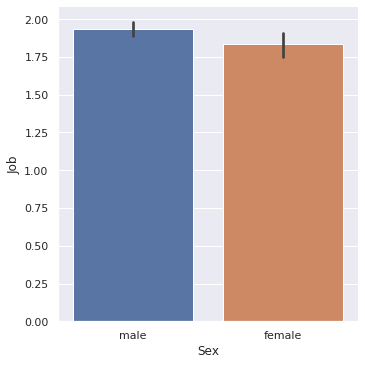

In [223]:
sns.catplot(x="Sex", y="Job",kind ="bar", data=data);

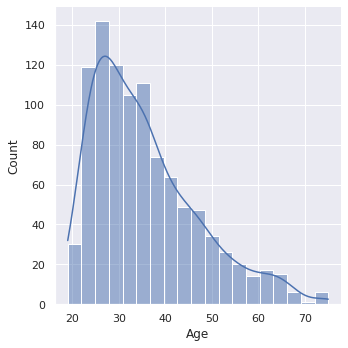

In [224]:
sns.displot(data = data,x="Age",kde=True);

<div dir=rtl>
    ۸.(۲ نمره)
    بجای تفکیک بر حسب جنسیت افراد را برحسب زمان(Duration) دسته‌بندی نمایید و ریسک وام‌دهی به آن‌ها را در یک نمودار به نمایش بگذارید.
    </div>

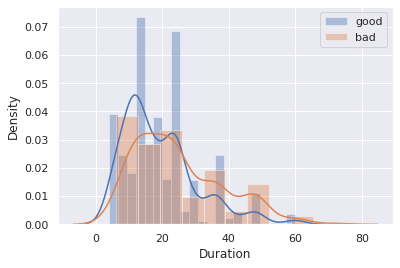

In [225]:
good=data[data["Risk"]=="good"]["Duration"]
bad=data[data["Risk"]=="bad"]["Duration"]
sns.distplot(good,label="good",hist=True)
sns.distplot(bad,label="bad",hist=True)
plt.legend();

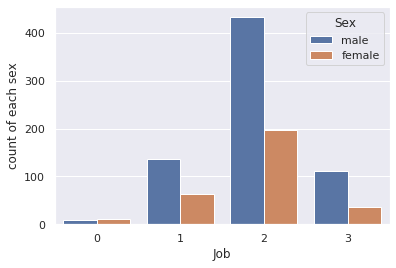

In [226]:
nemoodar = sns.countplot(x=data["Job"], hue=data["Sex"], data=pd.melt(data));
nemoodar.set(xlabel="Job", ylabel="count of each sex");

<div dir=rtl>
    ۹.(۲ نمره)
چهار نوع دسته‌بندی شغلی برای این افراد وجود دارد. 
در یک نمودار مشخص کنید که هر از هر جنسیت چند نفر در هر دسته شغلی مشغول به فعالیت هستند.
</div>

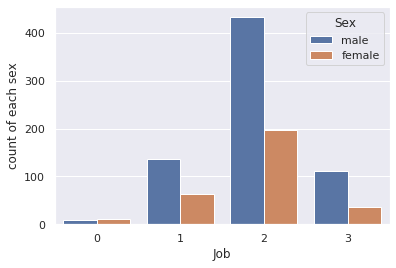

In [227]:
nemoodar = sns.countplot(x=data["Job"], hue=data["Sex"], data=pd.melt(data));
nemoodar.set(xlabel="Job", ylabel="count of each sex");

<div dir=rtl>
    ۱۰.(۴ نمره)
    نمودار توزیع تخمینی سن وام‌گیرندگان را نمایش دهید
    این نمودار چه چیزی را نمایش می‌دهد؟
</div>

<div dir=rtl>
    ۱۱.(۴ نمره)
    در این بانک به ۸ دلیل وام به متقاضیان پرداخت می‌گردد.
    در هر دسته شغلی مشخص کنید که علت عمده‌ای که افراد می‌خواهند وام بگیرند چیست؟
</div>

In [228]:
temp = data[["Job","Purpose"]]
grouped=temp.groupby("Job").agg(lambda x: x.value_counts().index[0])
grouped.head(4)

,Purpose
Job,
0,car
1,car
2,radio/TV
3,car


<div dir=rtl>
    ۱۳.(۶ نمره)
    در چهار نمودار به تفکیک میزان ریسک وام‌دهی هر گروه شغلی را به ازای جنسیت نمایش دهید.
</div>

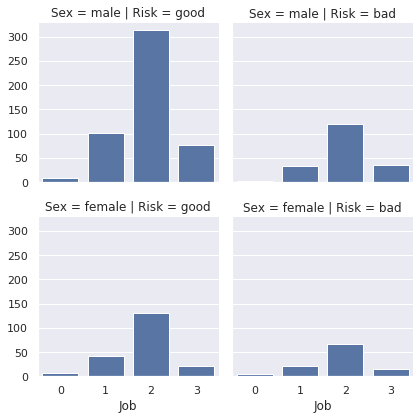

In [230]:
g = sns.FacetGrid(data, col="Risk",row="Sex")
g.map(sns.countplot, "Job");

<div dir=rtl>
    ۱۴.(۷ نمره)
    تمام داده‌ها را بصورت عددی در بیاورید.
</div>

In [231]:
dataset = data
dataset['Sex'] = dataset['Sex'].rank(method='dense', ascending=False).astype(int)
dataset['Housing'] = dataset['Housing'].rank(method='dense', ascending=False).astype(int)
dataset['Saving accounts'] = dataset['Saving accounts'].rank(method='dense', ascending=False).astype(int)
dataset['Checking account'] = dataset['Checking account'].rank(method='dense', ascending=False).astype(int)
dataset['Purpose'] = dataset['Purpose'].rank(method='dense', ascending=False).astype(int)
dataset['Risk'] = dataset['Risk'].rank(method='dense', ascending=False).astype(int)
dataset['Loaned Before'] = dataset['Loaned Before'].rank(method='dense', ascending=False).astype(int)
dataset.head(20)


,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Loaned Before
0,0,67,1,2,2,3,4,1169,6,3,1,1
1,1,22,2,2,2,5,3,5951,48,3,2,1
2,2,49,1,1,2,5,2,2096,12,5,1,3
3,3,45,1,2,3,5,4,7882,42,4,1,3
4,4,53,1,2,3,5,4,4870,24,7,2,2
5,5,35,1,1,3,3,2,9055,36,5,1,1
6,6,53,1,2,2,2,2,2835,24,4,1,2
7,7,35,1,3,1,5,3,6948,36,7,1,1
8,8,61,1,1,2,1,2,3059,12,3,1,2
9,9,28,1,3,2,5,3,5234,30,7,2,3


<div dir=rtl>
    ۱۵.(۵ نمره)
    نمودار heatmap از correlation ستون‌های مختلف با هم بکشید و چند جمله راجع به نتیجه‌ای که شما از مشاهده این نمودار گرفتید صحبت کنید.
</div>

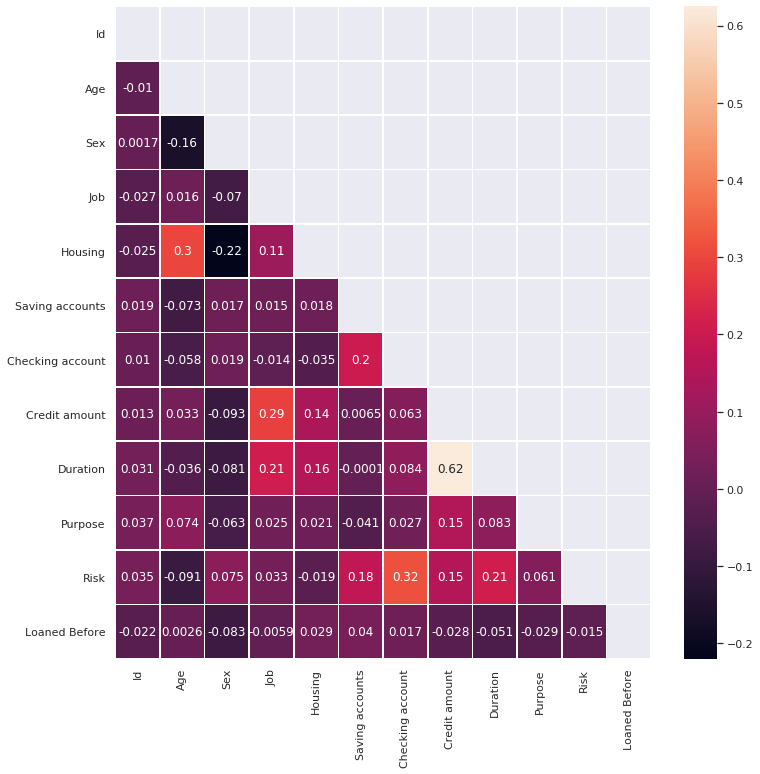

In [232]:
mask = np.triu(np.ones_like(dataset.corr(), dtype=np.bool))
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(dataset.corr(), annot=True, mask=mask, linewidths=.6, ax=ax);

<div dir=rtl>
    <h2>
        کاهش ابعاد
        (۴۲ نمره)
    </h2>
</div>

<div dir=rtl>
    ۱۶.
    (۳ نمره)
    برای بدست آوردن PCA ما نیاز به تمامی ستون‌ها نداریم و مثلا ستون id یا index فایده‌ای برای ما نخواهد داشت برای همین dataframe جدیدی ایجاد کنید و در آن از ستون‌های 
    <br/>
    'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'
    <br/>
    استفاده کنید.
</div>

<div dir=rtl>
    ۱۷.(۶ نمره)
    یکی از مواردی که ممکن است تاثیر مخربی روی تحلیل ما بگذارد تفاوت اندازه‌های اعداد ستون‌های مختلف است(چرا؟ خیلی کوتاه توضیح دهید) برای همین بهتر است داده‌ها را نرمالایز کنیم.
</div>

<div dir=rtl>
    ۱۸.(۳ نمره)
    حال نیاز است که ماتریس کواریانس این داده‌ها بدست بیاورید.
</div>

<div dir=rtl>
    ۱۹.(۲ نمره)
    باز برای آنکه ایده‌ای از این داده‌ها داشته باشیم heatmap ماتریس کواریانس را رسم کنید
</div>

<div dir=rtl>
    ۲۰.(۴ نمره)
مقدار و بردار ویژه‌ی ماتریس کواریانس را بدست بیاورید.
</div>

<div dir=rtl>
    ۲۱.(۳ نمره)
    برای انتخاب اجزای اساسی(Principle Components) سه کار ریز را انجام دهید:
    <br\>
هر بردار ویژه را با مقدار ویژه متناظرش مربوط کنید (می‌توانید بصورت جفتیpair آن‌ها را کنار هم قرار دهید)
        <br\>
            لیستی که بردار و مقدار ویژه‌ها دارید را بر اساس مقدار ویژه‌ها مرتب کنید
            <br\>
                مقدار ویژه‌های مرتب شده را به ترتیب نزولی در خروجی نمایش دهید
</div>

<div dir=rtl>
    ۲۲.(۴ نمره)
همه‌ی
    explained variance 
    را بدست بیاورید و در نمودار pie نمایش دهید
    حتما درصد هرکدام از اسلایس‌ها در نمودار مشخص شده‌باشد.
</div>

<div dir=rtl>
    ۲۳.(۴ نمره)
با توجه به آنچه در بخش قبل دیدید تعداد کامپوننت‌ها را طوری انتخاب کنید که پوشش حداقل ۶۰٪ای از اطلاعات داشته باشد و سپس projection matrix را با استفاده از آن‌ها تشکیل دهید.
    </div>

<div dir=rtl>
    ۲۴.(۵ نمره)
        با استفاده از ماتریس بدست آمده در مرحله قبل X را کاهش دهید
    و در یک نمودار scatter که x و y آن ازpricipal componentهای اول و دوم شما بدست آمده‌اند بر حسب Risk نتایج را نشان دهید 
</div>

<div dir=rtl>
    ۲۵.(۵ نمره)
    در این قسمت می‌خواهیم مقایسه‌ای بین tSNE و PCA داشت باشیم.
    برای tSNE از scikit learn استفاده کنید و نیازی نیست که آنرا خودتان پیاده‌سازی کنید.
    تبدیل X را با استفاده از tSNE با دو مولفه اصلی بدست بیاورید.
    توجه کنید که tSNE پارامترهای مختلفی دارد که می‌توان با تنظیم آن‌ها به نتایج مختلفی رسید. در مورد انتخابتان برای این پارامترها توضیح دهید.
</div>

<div dir=rtl>
    ۲۶.(۵ نمره)
    حال مانند کاری که در بخش ۲۴ کردید نمودار مربوط به این تبدیل را بکشید.
    بطور خلاصه اگر توضیحی راجع به این دو نمودار دارید بنویسید.
</div>